<a href="https://colab.research.google.com/github/mohmaed7777/Deep-learning-in-Tensorflow/blob/master/Linear_Regression_in_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression with Tensorflow:**

Defining a linear regression in simple terms, is the approximation of a linear model used to describe the relationship between two or more variables. In a simple linear regression there are two variables, the dependent variable, which can be seen as the "state" or "final goal" that we study and try to predict, and the independent variables, also known as explanatory variables, which can be seen as the "causes" of the "states".

When more than one independent variable is present the process is called multiple linear regression.
When multiple dependent variables are predicted the process is known as multivariate linear regression.

The equation of a simple linear model is

**𝑌=𝑎𝑋+𝑏**
 
Where Y is the dependent variable and X is the independent variable, and a and b being the parameters we adjust. a is known as "slope" or "gradient" and b is the "intercept". You can interpret this equation as Y being a function of X, or Y being dependent on X.

If you plot the model, you will see it is a line, and by adjusting the "slope" parameter you will change the angle between the line and the independent variable axis, and the "intercept parameter" will affect where it crosses the dependent variable's axis.

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
print(tf.__version__)

1.15.2


In [4]:
# Let's first import the required packages:
import matplotlib as plt 
import pandas as pd 
import pylab as pl 
import numpy as np 
import tensorflow as tf 
import matplotlib.patches as mpatches 
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (8, 6)

In [5]:
# Define the independent variables 
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

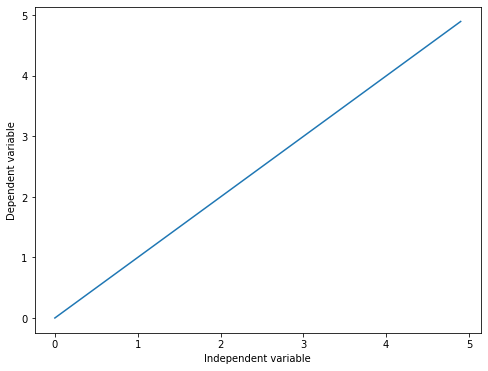

In [6]:
# adjusting the slope and intercepts to verify the changes in the graph 
a = 1 
b = 0
Y = a * X + b 
plt.plot(X, Y)
plt.ylabel('Dependent variable')
plt.xlabel('Independent variable')
plt.show()

In [7]:
# Download the dataset: 
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv


--2020-07-21 09:46:58--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.02s   

2020-07-21 09:46:59 (2.84 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



# **Understanding the dataset:**

We have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. Dataset source
MODELYEAR e.g. 2014
MAKE e.g. Acura
MODEL e.g. ILX
VEHICLE CLASS e.g. SUV
ENGINE SIZE e.g. 4.7
CYLINDERS e.g 6
TRANSMISSION e.g. A6
FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

In [8]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
df.count()

MODELYEAR                   1067
MAKE                        1067
MODEL                       1067
VEHICLECLASS                1067
ENGINESIZE                  1067
CYLINDERS                   1067
TRANSMISSION                1067
FUELTYPE                    1067
FUELCONSUMPTION_CITY        1067
FUELCONSUMPTION_HWY         1067
FUELCONSUMPTION_COMB        1067
FUELCONSUMPTION_COMB_MPG    1067
CO2EMISSIONS                1067
dtype: int64

In [10]:
df.shape

(1067, 13)

Lets say we want to use linear regression to predict Co2Emission of cars based on their engine size. So, lets define X and Y value for the linear regression, that is, train_x and train_y:

In [11]:
X_train = np.asarray(df['ENGINESIZE'])
Y_train = np.asarray(df['CO2EMISSIONS'])

First, we initialize the variables a and b, with any random guess, and then we define the linear function:

In [12]:
a = tf.Variable(10.0)
b = tf.Variable(20.3)
y = a * X_train + b
y

<tf.Tensor 'add:0' shape=(1067,) dtype=float32>

Now, we are going to define a loss function for our regression, so we can train our model to better fit our data. In a linear regression, we minimize the squared error of the difference between the predicted values(obtained from the equation) and the target values (the data that we have). In other words we want to minimize the square of the predicted values minus the target value. So we define the equation to be minimized as loss.

To find value of our loss, we use tf.reduce_mean(). This function finds the mean of a multidimensional tensor, and the result can have a different dimension.

In [13]:
loss = tf.reduce_mean(tf.square(y - Y_train))


Then, we define the optimizer method. The gradient Descent optimizer takes in parameter: learning rate, which corresponds to the speed with which the optimizer should learn; there are pros and cons for increasing the learning-rate parameter, with a high learning rate the training model converges quickly, but there is a risk that a high learning rate causes instability and the model will not converge. Please feel free to make changes to learning parameter and check its effect. On the other hand decreasing the learning rate might reduce the convergence speed, but it would increase the chance of converging to a solution. You should note that the solution might not be a global optimal solution as there is a chance that the optimizer will get stuck in a local optimal solution. Please review other material for further information on the optimization. Here we will use a simple gradient descent with a learning rate of 0.05:

In [14]:
optimizer = tf.train.GradientDescentOptimizer(0.05)

In [15]:
train = optimizer.minimize(loss)

In [16]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [18]:
loss_values = []
train_data = []
for step in range(100):
  _, loss_val , a_val , b_val = sess.run([train, loss, a , b])
  loss_values.append(loss_val)
  if step % 5 == 0:
    print(step, loss_val, a_val, b_val)
    train_data.append([a_val, b_val])

0 9003.38 53.25799 34.144917
5 2017.8967 60.434486 42.546093
10 1873.9364 58.869392 48.252808
15 1749.9357 57.503395 53.587673
20 1642.511 56.23098 58.55293
25 1549.4463 55.046665 63.174416
30 1468.8224 53.94435 67.475945
35 1398.9758 52.918354 71.479645
40 1338.466 51.963394 75.20616
45 1286.0447 51.074543 78.67467
50 1240.6309 50.24724 81.90303
55 1201.2878 49.47721 84.90788
60 1167.204 48.76049 87.704704
65 1137.6763 48.09339 90.307884
70 1112.0961 47.47249 92.730835
75 1089.9347 46.89456 94.98603
80 1070.7363 46.35666 97.08508
85 1054.1041 45.855988 99.03882
90 1039.6951 45.389984 100.857285
95 1027.2125 44.956245 102.54985


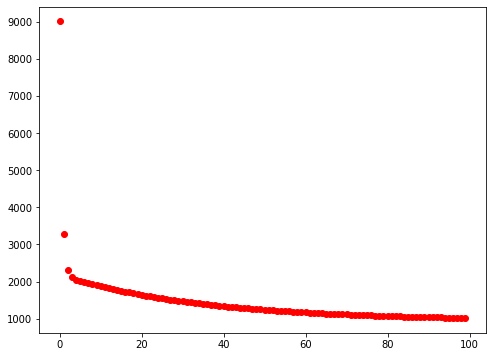

In [19]:
# plot the loss the loss values to see how it changed during the training
plt.plot(loss_values, 'ro')

Lets visualize how the coefficient and intercept of line has changed to fit the data:

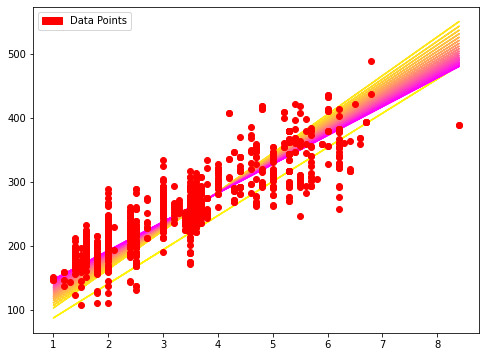

In [21]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(X_train)
    line = plt.plot(X_train, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(X_train, Y_train, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()